In [78]:
import numpy as np
import operator
import math
import TreePlot

In [2]:
tmp = []
with open('D1.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
D1 = np.array(tmp).astype('float')
D1

array([[0.264185, 0.178456, 0.      ],
       [0.409499, 0.213456, 1.      ],
       [0.926224, 0.540329, 1.      ],
       ...,
       [0.285166, 0.956678, 1.      ],
       [0.751571, 0.514041, 1.      ],
       [0.142654, 0.226182, 1.      ]])

In [ ]:
# https://zhuanlan.zhihu.com/p/107788754

In [3]:
D1l =  D1.tolist()

In [4]:
'''
递归创建树
'''
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]    # 获取类别列表

    # 假如都是同一类别
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 所有属性都已经遍历完或者样本在属性上相同
    if (len(dataSet[0]) == 1) or propertyIsSame(dataSet):
        return majorityCnt(classList)

    bestFeat = chooseBestFeature(dataSet)
    bestFeatLable = labels[bestFeat]
    decisionTree = {bestFeatLable:{}}
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    del (labels[bestFeat])
    for value in uniqueVals:
        subLabels = labels[:]
        decisionTree[bestFeatLable][value]  = createTree(splitDataSet(dataSet, bestFeat, value),
                                                         subLabels)
    return decisionTree

In [5]:
'''
判断样本在属性集合上取值是否相同
'''
def propertyIsSame(dataSet):
    numFeatures = len(dataSet[0])-1
    for i in range(numFeatures):
        temp = dataSet[0][i]
        for data in dataSet:
            if data[i] != temp:
                return 0
    return 1

In [6]:
'''
获取数量最多的类别
'''
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

    return sortedClassCount[0][0]

In [7]:
'''
选择最好的特征，ID3算法
'''
def chooseBestFeature(dataSet):
    numEntries = len(dataSet)
    numFeatures = len(dataSet[0])-1 # 特征数
    baseEnt = calcShannonEnt(dataSet)   # 总的信息嫡
    baseInfoGain = 0.0          # 信息增益
    bestFeature = -1            # 最好的特征的Index
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]  # 获取该特征的所有特征值
        uniqueVals = set(featList)     # 获取特征的不同特征值集合
        newEnt = 0.0 # 按照此特征进行分类的信息嫡之和
        for val in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, val)
            prob = len(subDataSet)/float(numEntries)
            newEnt += prob * calcShannonEnt(subDataSet)
        infoGain = baseEnt - newEnt
        if infoGain > baseInfoGain :
            baseInfoGain = infoGain
            bestFeature = i

    return bestFeature

In [8]:
'''
信息嫡的计算
'''
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)   # 数据集的数量
    labelCounts = {}            # label及其数量
    # 统计label及对应的数量
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1

    # 计算香农嫡
    shannonEnt = 0.0    # 香农嫡
    for key in labelCounts.keys():
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * math.log(prob, 2)
    return shannonEnt

In [9]:
'''
划分出分类后的数据集
'''
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

In [66]:
'''
创建数据集
'''
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['生存', '脚蹼']
    return dataSet, labels

{'生存': {0: 'no', 1: {'脚蹼': {0: 'no', 1: 'yes'}}}}


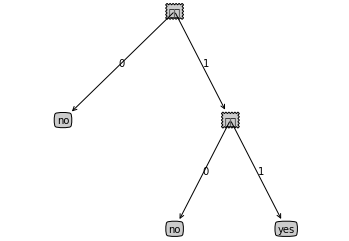

In [65]:
# 创建示例数据集
dataSet, labels = createDataSet()

# 学习构建决策树
tree = createTree(dataSet, labels)
print(tree)

# 画决策树
TreePlot.createPlot(tree)

In [52]:
dataSet[0]

[1, 1, 'yes']

In [39]:
len(dataSet[0])-1

2

In [54]:
len(dataSet[0])

3

In [40]:
FeatList = [example[0] for example in dataSet]
FeatList

[1, 1, 1, 0, 0]

In [41]:
set(FeatList)

{0, 1}

In [43]:
splitDataSet(dataSet, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [45]:
len(splitDataSet(dataSet, 0, 1))

3

In [47]:
classList = [example[-1] for example in dataSet]    # 获取类别列表
classList

['yes', 'yes', 'no', 'no', 'no']

In [74]:
classCount = {}
type(classCount)

dict

In [49]:
classList[0]

'yes'

In [75]:
for vote in classList:
    if vote not in classCount.keys():
        classCount[vote] = 0
    classCount[vote] += 1
classCount

{'yes': 2, 'no': 3}

In [76]:
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
sortedClassCount

[('no', 3), ('yes', 2)]

In [77]:
sortedClassCount[0][0]

'no'

In [48]:
classList.count(classList[0])

2

In [50]:
# 假如都是同一类别
if classList.count(classList[0]) == len(classList):
    return classList[0]

SyntaxError: 'return' outside function (<ipython-input-50-28c123e9d1c2>, line 3)

In [62]:
for i in range(len(dataSet[0])-1):
    temp = dataSet[0][i]
temp

0
1


1

In [60]:
range(len(dataSet[0])-1)

range(0, 2)

In [72]:
a = 1
for i in range(len(dataSet[0])-1):
        temp = dataSet[0][i]
        for data in dataSet:
            if data[i] != temp:
                a = 0
a

0

In [69]:
dataSet[0][1]

1

In [14]:
def createDataSet():
    dataSet = D1l
    labels = ['x1', 'x2']
    return dataSet, labels

In [15]:
# 创建示例数据集
dataSet, labels = createDataSet()

In [16]:
dataSet

[[0.264185, 0.178456, 0.0],
 [0.409499, 0.213456, 1.0],
 [0.926224, 0.540329, 1.0],
 [0.573685, 0.282145, 1.0],
 [0.953159, 0.608121, 1.0],
 [0.422326, 0.844277, 1.0],
 [0.733995, 0.578508, 1.0],
 [0.528926, 0.395999, 1.0],
 [0.844507, 0.888243, 1.0],
 [0.516632, 0.621279, 1.0],
 [0.613356, 0.913753, 1.0],
 [0.05193, 0.224059, 1.0],
 [0.693076, 0.771207, 1.0],
 [0.218459, 0.0948, 0.0],
 [0.462623, 0.91613, 1.0],
 [0.565444, 0.906358, 1.0],
 [0.709766, 0.990023, 1.0],
 [0.476188, 0.507265, 1.0],
 [0.428589, 0.098529, 0.0],
 [0.916433, 0.603193, 1.0],
 [0.846905, 0.132193, 0.0],
 [0.586053, 0.68922, 1.0],
 [0.483662, 0.495088, 1.0],
 [0.318465, 0.037164, 0.0],
 [0.679985, 0.385115, 1.0],
 [0.546181, 0.817448, 1.0],
 [0.698597, 0.553553, 1.0],
 [0.948181, 0.672108, 1.0],
 [0.291281, 0.623738, 1.0],
 [0.532965, 0.748927, 1.0],
 [0.87998, 0.237742, 1.0],
 [0.759743, 0.195766, 0.0],
 [0.333399, 0.565892, 1.0],
 [0.734303, 0.084971, 0.0],
 [0.11712, 0.040817, 0.0],
 [0.652226, 0.429767, 1.0],

In [17]:
labels

['x1', 'x2']

In [18]:
# 学习构建决策树
tree = createTree(dataSet, labels)
print(tree)

{'x1': {0.422326: 1.0, 0.524025: 1.0, 0.333399: 1.0, 0.442704: 1.0, 0.589982: 1.0, 0.216488: 1.0, 0.529928: 1.0, 0.542097: 1.0, 0.807976: 1.0, 0.667834: 1.0, 0.582407: 1.0, 0.415189: 1.0, 0.56673: 0.0, 0.533555: 1.0, 0.333162: 1.0, 0.549173: 1.0, 0.292126: 1.0, 0.738249: 1.0, 0.631186: 0.0, 0.2761: 1.0, 0.719413: 1.0, 0.675281: 0.0, 0.845595: 1.0, 0.706152: 1.0, 0.656564: 1.0, 0.993661: 1.0, 0.539354: 1.0, 0.362395: 1.0, 0.805911: 1.0, 0.583509: 1.0, 0.518152: 1.0, 0.373285: 1.0, 0.764698: 1.0, 0.238791: 1.0, 0.462739: 1.0, 0.805307: 0.0, 0.156809: 1.0, 0.413894: 0.0, 0.715058: 1.0, 0.433407: 0.0, 0.536129: 1.0, 0.833004: 1.0, 0.143579: 1.0, 0.011844: 1.0, 0.553717: 1.0, 0.479881: 0.0, 0.063858: 1.0, 0.749795: 1.0, 0.293537: 0.0, 0.427903: 1.0, 0.804104: 0.0, 0.656826: 1.0, 0.792768: 1.0, 0.416586: 1.0, 0.020689: 0.0, 0.038951: 0.0, 0.398189: 1.0, 0.619303: 1.0, 0.930621: 1.0, 0.909874: 1.0, 0.539951: 1.0, 0.473575: 1.0, 0.624729: 1.0, 0.058757: 1.0, 0.591896: 1.0, 0.739568: 1.0, 0.766

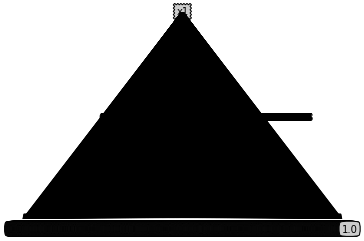

In [19]:
# 画决策树
TreePlot.createPlot(tree)

In [33]:
D1s = D1[0:50,:]
D1s

array([[0.264185, 0.178456, 0.      ],
       [0.409499, 0.213456, 1.      ],
       [0.926224, 0.540329, 1.      ],
       [0.573685, 0.282145, 1.      ],
       [0.953159, 0.608121, 1.      ],
       [0.422326, 0.844277, 1.      ],
       [0.733995, 0.578508, 1.      ],
       [0.528926, 0.395999, 1.      ],
       [0.844507, 0.888243, 1.      ],
       [0.516632, 0.621279, 1.      ],
       [0.613356, 0.913753, 1.      ],
       [0.05193 , 0.224059, 1.      ],
       [0.693076, 0.771207, 1.      ],
       [0.218459, 0.0948  , 0.      ],
       [0.462623, 0.91613 , 1.      ],
       [0.565444, 0.906358, 1.      ],
       [0.709766, 0.990023, 1.      ],
       [0.476188, 0.507265, 1.      ],
       [0.428589, 0.098529, 0.      ],
       [0.916433, 0.603193, 1.      ],
       [0.846905, 0.132193, 0.      ],
       [0.586053, 0.68922 , 1.      ],
       [0.483662, 0.495088, 1.      ],
       [0.318465, 0.037164, 0.      ],
       [0.679985, 0.385115, 1.      ],
       [0.546181, 0.81744

In [34]:
def createDataSet():
    dataSet = D1s.tolist()
    labels = ['x1', 'x2']
    return dataSet, labels
# 创建示例数据集
dataSet, labels = createDataSet()

In [35]:
dataSet

[[0.264185, 0.178456, 0.0],
 [0.409499, 0.213456, 1.0],
 [0.926224, 0.540329, 1.0],
 [0.573685, 0.282145, 1.0],
 [0.953159, 0.608121, 1.0],
 [0.422326, 0.844277, 1.0],
 [0.733995, 0.578508, 1.0],
 [0.528926, 0.395999, 1.0],
 [0.844507, 0.888243, 1.0],
 [0.516632, 0.621279, 1.0],
 [0.613356, 0.913753, 1.0],
 [0.05193, 0.224059, 1.0],
 [0.693076, 0.771207, 1.0],
 [0.218459, 0.0948, 0.0],
 [0.462623, 0.91613, 1.0],
 [0.565444, 0.906358, 1.0],
 [0.709766, 0.990023, 1.0],
 [0.476188, 0.507265, 1.0],
 [0.428589, 0.098529, 0.0],
 [0.916433, 0.603193, 1.0],
 [0.846905, 0.132193, 0.0],
 [0.586053, 0.68922, 1.0],
 [0.483662, 0.495088, 1.0],
 [0.318465, 0.037164, 0.0],
 [0.679985, 0.385115, 1.0],
 [0.546181, 0.817448, 1.0],
 [0.698597, 0.553553, 1.0],
 [0.948181, 0.672108, 1.0],
 [0.291281, 0.623738, 1.0],
 [0.532965, 0.748927, 1.0],
 [0.87998, 0.237742, 1.0],
 [0.759743, 0.195766, 0.0],
 [0.333399, 0.565892, 1.0],
 [0.734303, 0.084971, 0.0],
 [0.11712, 0.040817, 0.0],
 [0.652226, 0.429767, 1.0],

{'x1': {0.264185: 0.0, 0.926224: 1.0, 0.573685: 1.0, 0.409499: 1.0, 0.953159: 1.0, 0.422326: 1.0, 0.733995: 1.0, 0.528926: 1.0, 0.844507: 1.0, 0.516632: 1.0, 0.948181: 1.0, 0.11712: 0.0, 0.318465: 0.0, 0.87998: 1.0, 0.589599: 1.0, 0.144057: 1.0, 0.586053: 1.0, 0.291281: 1.0, 0.282226: 1.0, 0.10117: 1.0, 0.613356: 1.0, 0.916433: 1.0, 0.846905: 0.0, 0.693076: 1.0, 0.333399: 1.0, 0.565444: 1.0, 0.698597: 1.0, 0.05193: 1.0, 0.672417: 1.0, 0.988055: 1.0, 0.813524: 0.0, 0.342149: 1.0, 0.218459: 0.0, 0.442704: 1.0, 0.964468: 1.0, 0.532965: 1.0, 0.483662: 1.0, 0.462623: 1.0, 0.546181: 1.0, 0.652226: 1.0, 0.312022: 1.0, 0.397657: 1.0, 0.265848: 1.0, 0.428589: 0.0, 0.734303: 0.0, 0.476188: 1.0, 0.679985: 1.0, 0.759743: 0.0, 0.495478: 1.0, 0.709766: 1.0}}


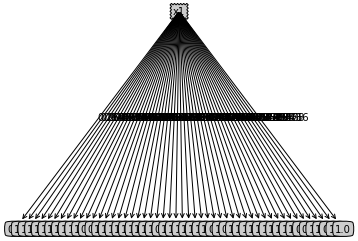

In [36]:
# 学习构建决策树
tree = createTree(dataSet, labels)
print(tree)
# 画决策树
TreePlot.createPlot(tree)